In [1]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from keras.layers import Dropout
import numpy as np

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [21]:
dataset = pd.read_csv('bor3hci.csv', header=0, index_col=0)
#dataset=dataset.del((:,0))
dataset=dataset.fillna(0)
dataset = dataset.drop((c for c in dataset.columns[-1:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output
n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))

Train on 246 samples, validate on 25 samples
Epoch 1/500
 - 1s - loss: 0.3639 - val_loss: 0.3223
Epoch 2/500
 - 0s - loss: 0.2538 - val_loss: 0.2995
Epoch 3/500
 - 0s - loss: 0.2167 - val_loss: 0.2812
Epoch 4/500
 - 0s - loss: 0.2054 - val_loss: 0.2735
Epoch 5/500
 - 0s - loss: 0.2007 - val_loss: 0.2679
Epoch 6/500
 - 0s - loss: 0.1844 - val_loss: 0.2514
Epoch 7/500
 - 0s - loss: 0.1822 - val_loss: 0.2424
Epoch 8/500
 - 0s - loss: 0.1869 - val_loss: 0.2413
Epoch 9/500
 - 0s - loss: 0.1761 - val_loss: 0.2303
Epoch 10/500
 - 0s - loss: 0.1710 - val_loss: 0.2217
Epoch 11/500
 - 0s - loss: 0.1696 - val_loss: 0.2200
Epoch 12/500
 - 0s - loss: 0.1710 - val_loss: 0.2125
Epoch 13/500
 - 0s - loss: 0.1654 - val_loss: 0.2171
Epoch 14/500
 - 0s - loss: 0.1647 - val_loss: 0.2057
Epoch 15/500
 - 0s - loss: 0.1687 - val_loss: 0.2054
Epoch 16/500
 - 0s - loss: 0.1617 - val_loss: 0.1976
Epoch 17/500
 - 0s - loss: 0.1590 - val_loss: 0.1955
Epoch 18/500
 - 0s - loss: 0.1585 - val_loss: 0.1911
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.1285 - val_loss: 0.1683
Epoch 155/500
 - 0s - loss: 0.1273 - val_loss: 0.1592
Epoch 156/500
 - 0s - loss: 0.1279 - val_loss: 0.1727
Epoch 157/500
 - 0s - loss: 0.1287 - val_loss: 0.1644
Epoch 158/500
 - 0s - loss: 0.1273 - val_loss: 0.1624
Epoch 159/500
 - 0s - loss: 0.1280 - val_loss: 0.1704
Epoch 160/500
 - 0s - loss: 0.1280 - val_loss: 0.1695
Epoch 161/500
 - 0s - loss: 0.1270 - val_loss: 0.1667
Epoch 162/500
 - 0s - loss: 0.1272 - val_loss: 0.1620
Epoch 163/500
 - 0s - loss: 0.1269 - val_loss: 0.1754
Epoch 164/500
 - 0s - loss: 0.1276 - val_loss: 0.1764
Epoch 165/500
 - 0s - loss: 0.1268 - val_loss: 0.1599
Epoch 166/500
 - 0s - loss: 0.1265 - val_loss: 0.1718
Epoch 167/500
 - 0s - loss: 0.1276 - val_loss: 0.1757
Epoch 168/500
 - 0s - loss: 0.1266 - val_loss: 0.1656
Epoch 169/500
 - 0s - loss: 0.1290 - val_loss: 0.1675
Epoch 170/500
 - 0s - loss: 0.1281 - val_loss: 0.1800
Epoch 171/500
 - 0s - loss: 0.1270 - val_loss: 0.1591
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1209 - val_loss: 0.1742
Epoch 307/500
 - 0s - loss: 0.1201 - val_loss: 0.1680
Epoch 308/500
 - 0s - loss: 0.1198 - val_loss: 0.1737
Epoch 309/500
 - 0s - loss: 0.1200 - val_loss: 0.1911
Epoch 310/500
 - 0s - loss: 0.1200 - val_loss: 0.1666
Epoch 311/500
 - 0s - loss: 0.1208 - val_loss: 0.1817
Epoch 312/500
 - 0s - loss: 0.1203 - val_loss: 0.1753
Epoch 313/500
 - 0s - loss: 0.1202 - val_loss: 0.1671
Epoch 314/500
 - 0s - loss: 0.1199 - val_loss: 0.1753
Epoch 315/500
 - 0s - loss: 0.1197 - val_loss: 0.1742
Epoch 316/500
 - 0s - loss: 0.1193 - val_loss: 0.1716
Epoch 317/500
 - 0s - loss: 0.1201 - val_loss: 0.1718
Epoch 318/500
 - 0s - loss: 0.1196 - val_loss: 0.1981
Epoch 319/500
 - 0s - loss: 0.1199 - val_loss: 0.1691
Epoch 320/500
 - 0s - loss: 0.1213 - val_loss: 0.1715
Epoch 321/500
 - 0s - loss: 0.1194 - val_loss: 0.1844
Epoch 322/500
 - 0s - loss: 0.1193 - val_loss: 0.1734
Epoch 323/500
 - 0s - loss: 0.1200 - val_loss: 0.1812
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1030 - val_loss: 0.1764
Epoch 459/500
 - 0s - loss: 0.1024 - val_loss: 0.1652
Epoch 460/500
 - 0s - loss: 0.1029 - val_loss: 0.1780
Epoch 461/500
 - 0s - loss: 0.1023 - val_loss: 0.1639
Epoch 462/500
 - 0s - loss: 0.1023 - val_loss: 0.1649
Epoch 463/500
 - 0s - loss: 0.1024 - val_loss: 0.1799
Epoch 464/500
 - 0s - loss: 0.1026 - val_loss: 0.1674
Epoch 465/500
 - 0s - loss: 0.1031 - val_loss: 0.1957
Epoch 466/500
 - 0s - loss: 0.1033 - val_loss: 0.1609
Epoch 467/500
 - 0s - loss: 0.1033 - val_loss: 0.1913
Epoch 468/500
 - 0s - loss: 0.1025 - val_loss: 0.1631
Epoch 469/500
 - 0s - loss: 0.1025 - val_loss: 0.1856
Epoch 470/500
 - 0s - loss: 0.1022 - val_loss: 0.1594
Epoch 471/500
 - 0s - loss: 0.1030 - val_loss: 0.1777
Epoch 472/500
 - 0s - loss: 0.1023 - val_loss: 0.1606
Epoch 473/500
 - 0s - loss: 0.1026 - val_loss: 0.1849
Epoch 474/500
 - 0s - loss: 0.1026 - val_loss: 0.1694
Epoch 475/500
 - 0s - loss: 0.1022 - val_loss: 0.1775
Epoch 476/500
 - 0s - loss: 

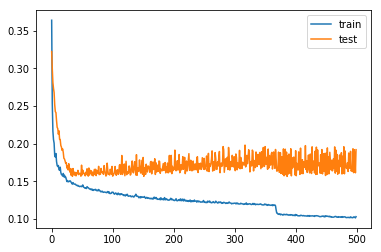

In [22]:
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=10,activation='relu',input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adagrad', loss='mae')
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [23]:
#X_test = X_test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 279.129


In [24]:
i=0
ninhat=[]
x_input = scaled[-12:,:]
x_input = x_input.reshape((1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input, verbose=0)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [25]:
print(nx_input.shape)
print(nyhat.shape)
print(ninhat.shape)

(1, 12, 8)
(3, 8)
(192,)


In [26]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)
print(ninhat.shape)

(24, 8)


In [27]:
print(ninhat[:,4:7])

[[0.00000000e+00 3.71094844e-01 8.41140900e+02]
 [9.75735397e+01 4.33010388e-02 2.46442215e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.42279998e+02 2.08228550e-01 7.28328746e+02]
 [0.00000000e+00 6.34687199e-02 1.25190320e+03]
 [2.88733948e+02 1.01201550e-01 1.59514643e+03]
 [2.69407146e+02 2.02667979e-01 1.38218576e+03]
 [0.00000000e+00 2.16733298e-01 1.28631148e+03]
 [4.49983922e+02 2.53682097e-01 1.38165494e+03]
 [4.69399397e+02 2.92883390e-01 1.40552497e+03]
 [0.00000000e+00 1.57069232e-01 1.46760433e+03]
 [4.00740134e+02 1.62054741e-01 1.45719541e+03]
 [4.03276482e+02 2.24662776e-01 1.395820

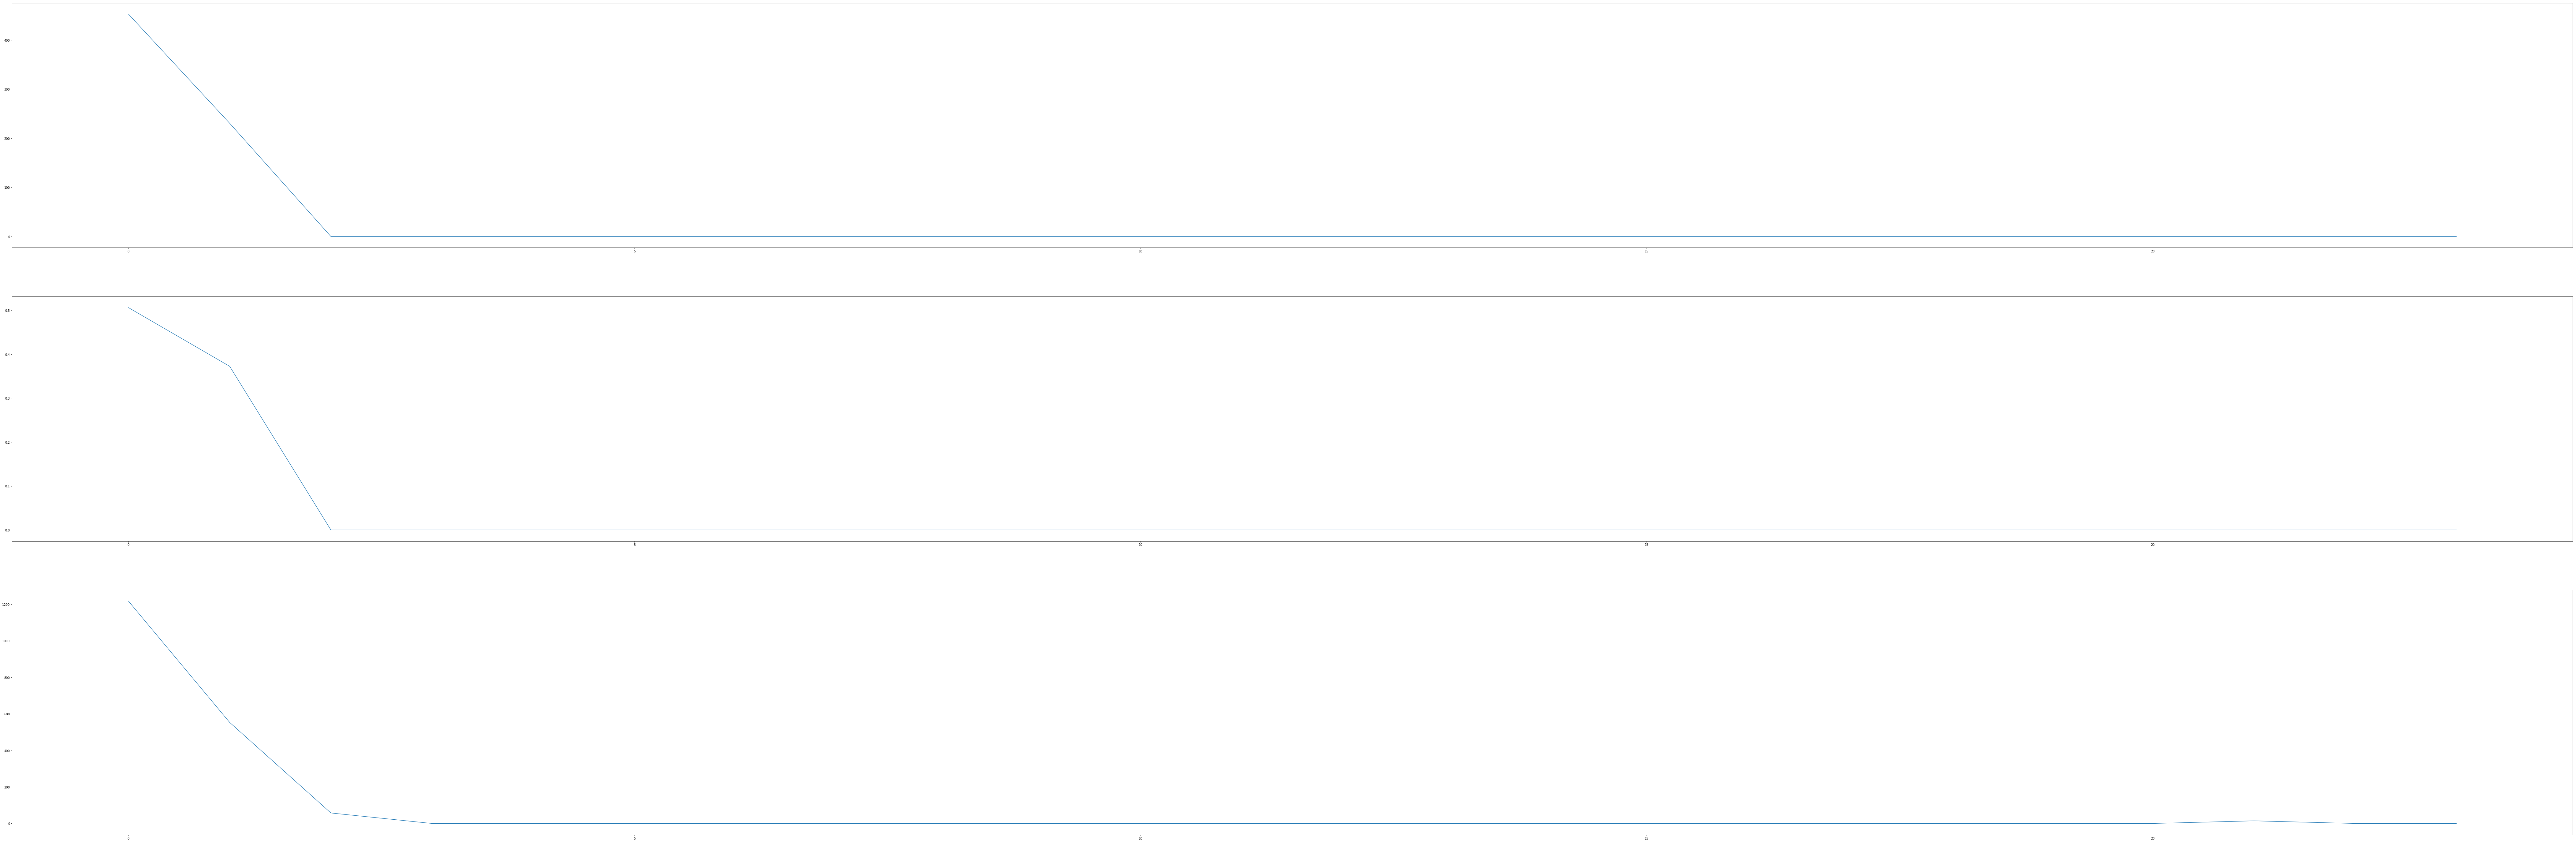

In [10]:
groups = [4,5,6]
i = 1
# plot each column
plt.figure(figsize=(150,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[:,group])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()


In [11]:
new = dataset

In [12]:
new.shape

(272, 8)

In [13]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [14]:
new.index

Index(['01/05/92', '01/06/92', '01/07/92', '01/08/92', '01/09/92', '01/10/92',
       '01/11/92', '01/12/92', '01/01/93', '01/02/93',
       ...
       '01/03/14', '01/04/14', '01/05/14', '01/06/14', '01/07/14', '01/08/14',
       '01/09/14', '01/10/14', '01/11/14', '01/12/14'],
      dtype='object', name='Date', length=272)

In [15]:
nin=new.index[-1]
print(nin)

01/12/14


In [16]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [17]:
newxhat.shape

(24, 8)

In [18]:
new=new.append(newxhat)
new.shape

(296, 8)

In [19]:
new.tail()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
19,346.169185,39.807961,0.0,0.0,0.0,0.0,0.000000,0.0
20,346.250612,39.637988,0.0,0.0,0.0,0.0,0.000000,0.0
21,354.957264,40.074984,0.0,0.0,0.0,0.0,14.443608,0.0
22,347.208563,39.906571,0.0,0.0,0.0,0.0,0.000000,0.0
23,348.130796,39.777732,0.0,0.0,0.0,0.0,0.000000,0.0


In [20]:
newbori = new.to_csv('newbori2c.csv')